In [1]:
import os


In [2]:
import pandas as pd
wines = pd.read_csv('winequality-red.csv')

In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

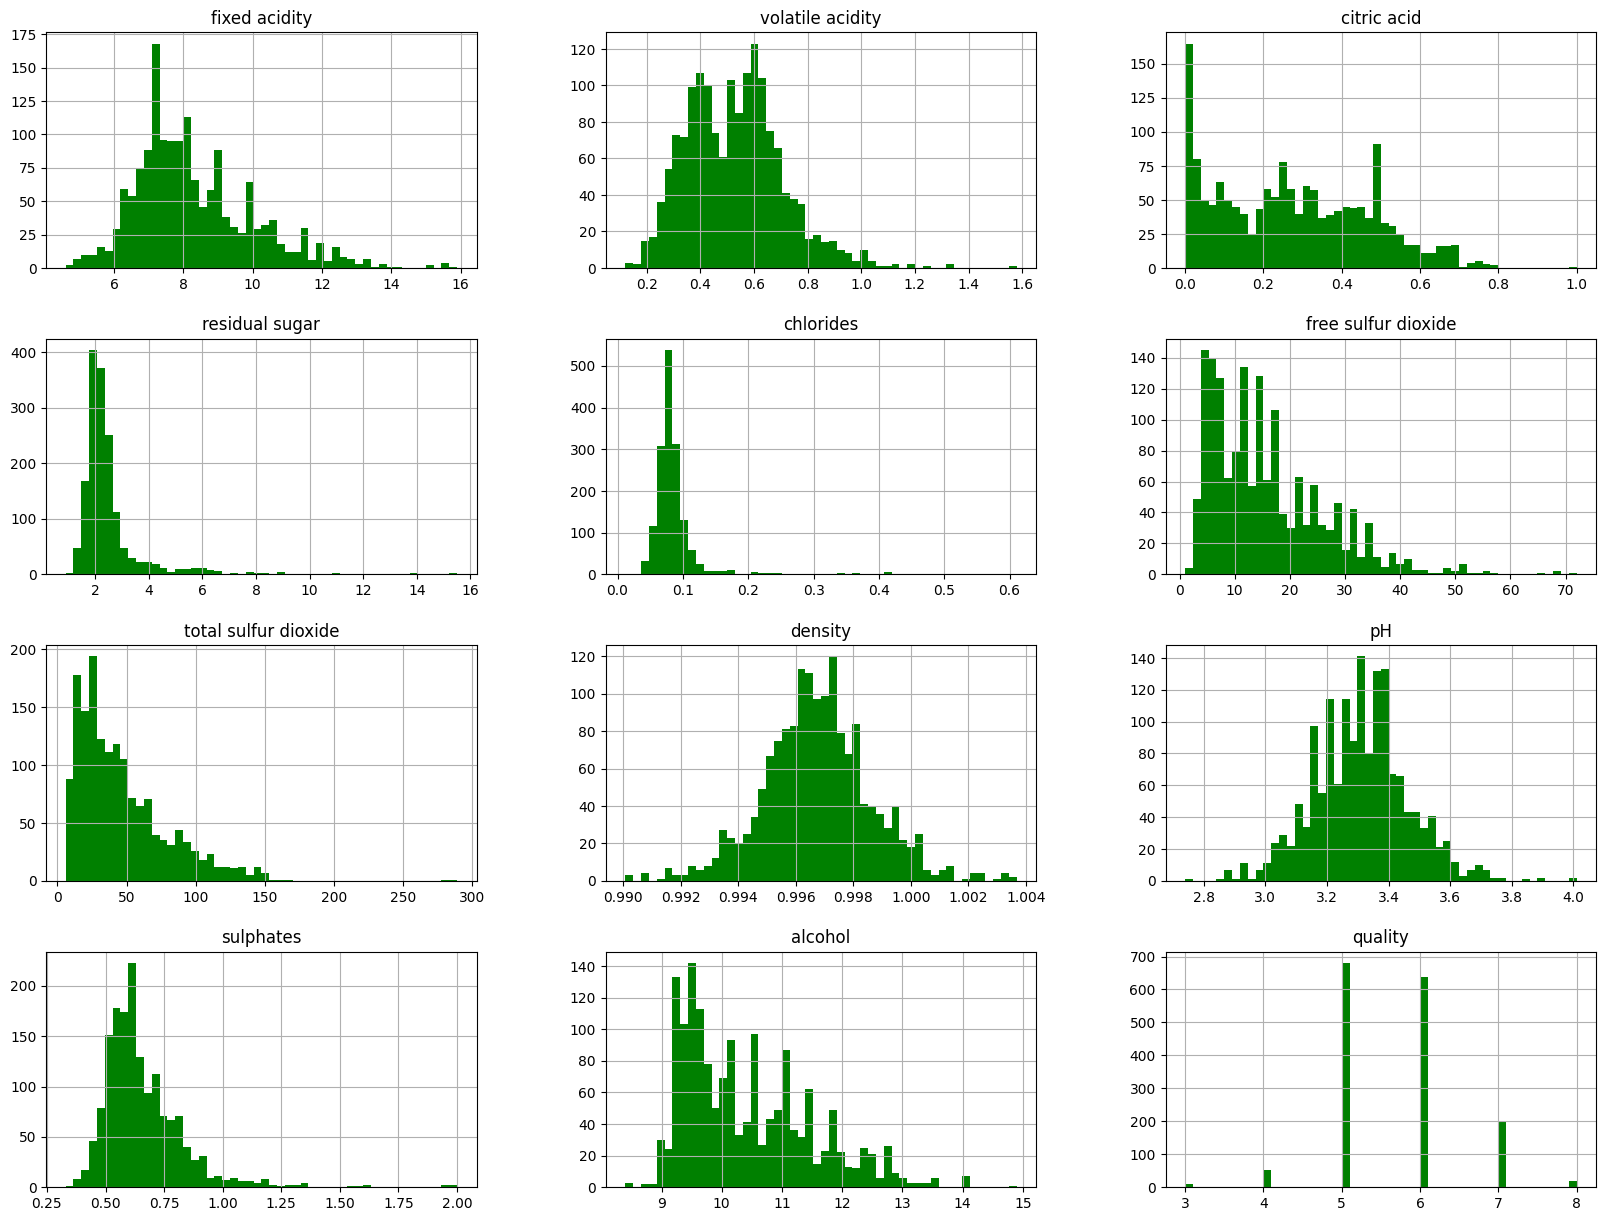

In [6]:
import matplotlib.pyplot as plt

wines.hist(bins=50, figsize=(20,15),color='g')

### Skewness values

In [7]:
data = wines
skewed_features = data.skew().sort_values(ascending=False)
print("Skewness values:\n", skewed_features)

Skewness values:
 chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64


In [8]:
import numpy as np
# Apply log1p transformation to highly skewed features (skewness > 1)
skewed_columns = ['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide']
data[skewed_columns] = np.log1p(data[skewed_columns])

# Check the skewness again after transformation
print("Skewness after log transformation:\n", data.skew())


Skewness after log transformation:
 fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide     1.250567
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.860829
quality                 0.217802
dtype: float64


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

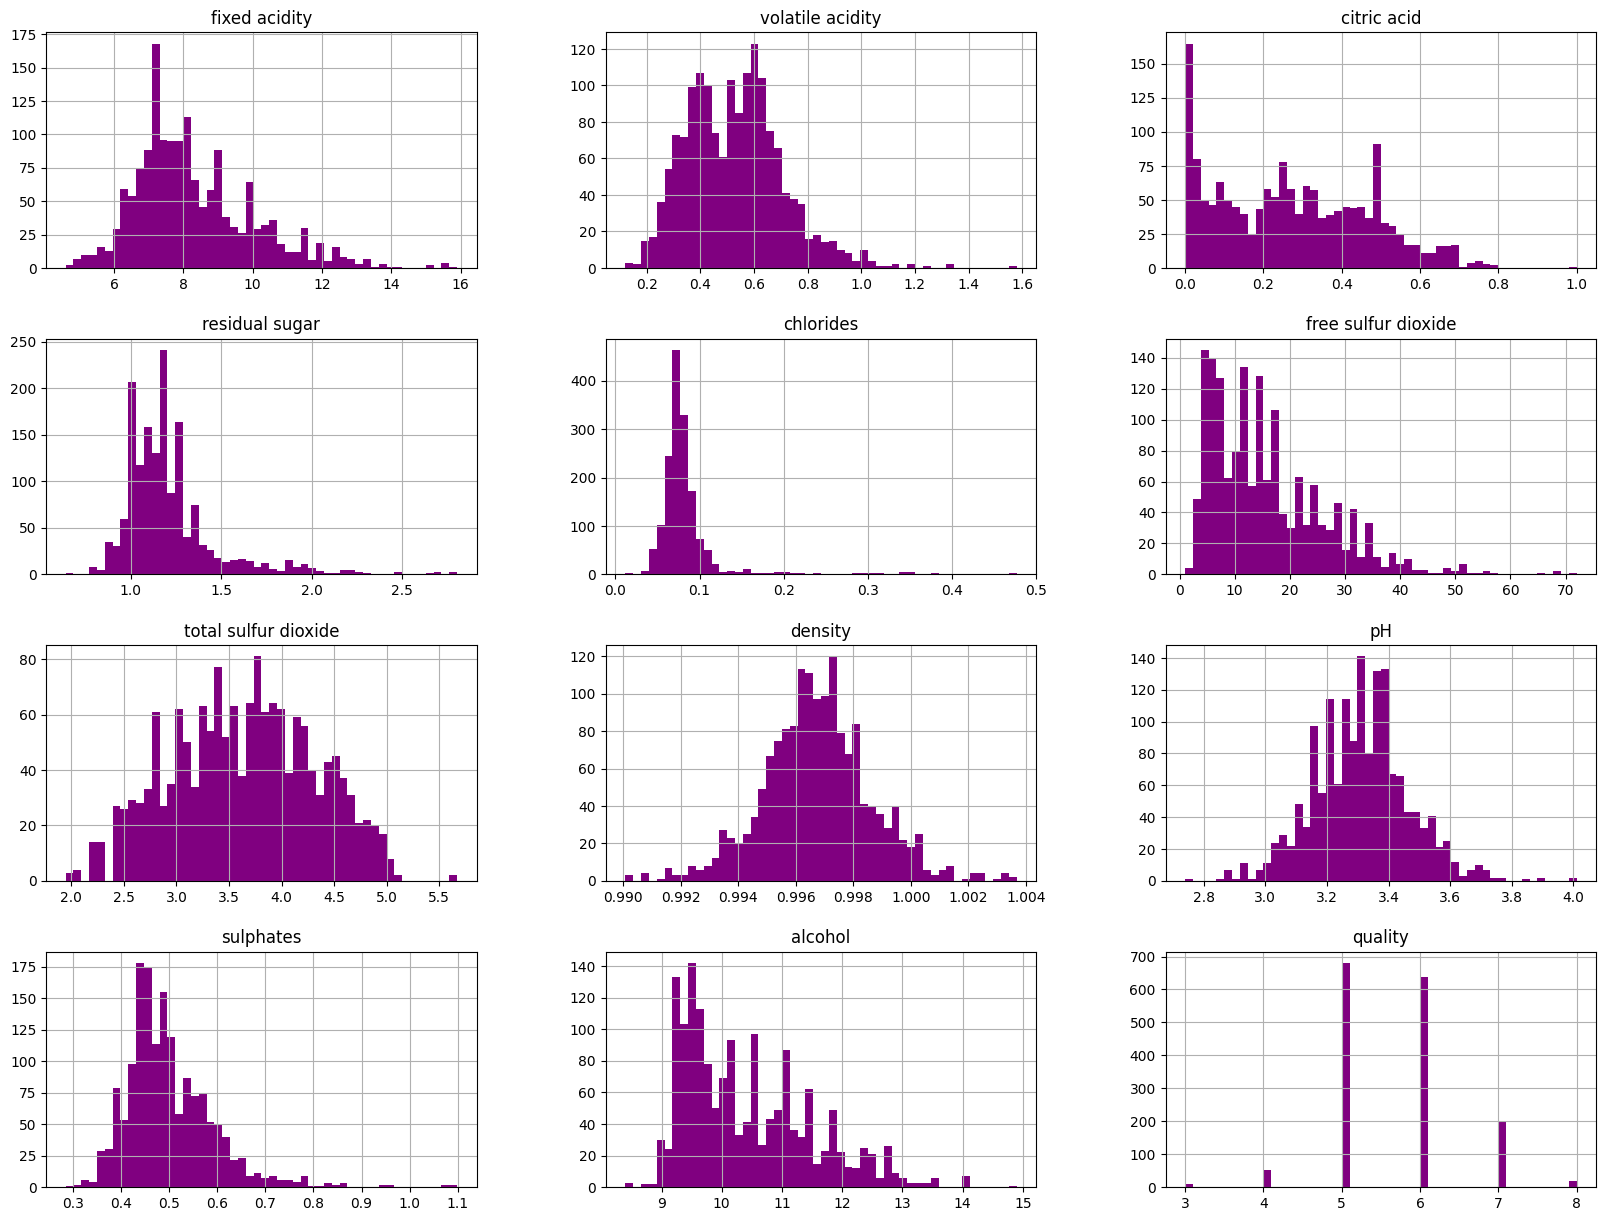

In [9]:
data.hist(bins=50, figsize=(20,15),color='purple')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5
1,7.8,0.88,0.00,1.280934,0.093490,25.0,4.219508,0.9968,3.20,0.518794,9.8,5
2,7.8,0.76,0.04,1.193922,0.088011,15.0,4.007333,0.9970,3.26,0.500775,9.8,5
3,11.2,0.28,0.56,1.064711,0.072321,17.0,4.110874,0.9980,3.16,0.457425,9.8,6
4,7.4,0.70,0.00,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4,5


In [12]:
X = data.drop(['quality',], axis=1)
y = data['quality']

In [13]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4
1,7.8,0.88,0.00,1.280934,0.093490,25.0,4.219508,0.9968,3.20,0.518794,9.8
2,7.8,0.76,0.04,1.193922,0.088011,15.0,4.007333,0.9970,3.26,0.500775,9.8
3,11.2,0.28,0.56,1.064711,0.072321,17.0,4.110874,0.9980,3.16,0.457425,9.8
4,7.4,0.70,0.00,1.064711,0.073250,11.0,3.555348,0.9978,3.51,0.444686,9.4


In [28]:
data['free sulfur dioxide'].value_counts()

free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
23.0     32
26.0     32
20.0     30
27.0     29
25.0     24
28.0     23
29.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
33.0     11
36.0     11
38.0      9
41.0      7
40.0      6
39.0      5
51.0      4
48.0      4
45.0      3
52.0      3
37.0      3
42.0      3
1.0       3
43.0      3
50.0      2
68.0      2
55.0      2
37.5      2
40.5      1
47.0      1
2.0       1
46.0      1
54.0      1
5.5       1
57.0      1
53.0      1
72.0      1
66.0      1
Name: count, dtype: int64

In [14]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### Data Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape 

((1279, 11), (320, 11), (1279,), (320,))

In [18]:
from sklearn.linear_model import ElasticNet

In [20]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

In [21]:
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

### Evalution Matrix 

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [23]:
def evalution_matrix(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mse, rmse , mae, r2


In [25]:
predicted_value = lr.predict(X_test)

In [26]:
mse, rmse , mae, r2 = evalution_matrix(y_test, predicted_value)

In [27]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Mean Squared Error:  0.4868827926497534
Root Mean Squared Error:  0.6977698708383399
Mean Absolute Error:  0.5678506374718506
R2 Score:  0.25496797669817617


### Normalization

In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the Standard Scaler
scaler = StandardScaler()



In [29]:
features = data.drop(['quality'], axis=1)

In [32]:
# Apply Standardization
data_standardized = scaler.fit_transform(features)

# Convert back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=features.columns)

# Include 'quality' back in the dataset
data_standardized['quality'] = data['quality']

# Check the standardized data
print(data_standardized.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.568467  -0.251089   
1      -0.298547          1.967442    -1.391472        0.232701   0.268164   
2      -0.298547          1.297065    -1.186070       -0.089701   0.127588   
3       1.654856         -1.384443     1.484154       -0.568467  -0.274943   
4      -0.528360          0.961877    -1.391472       -0.568467  -0.251089   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.116363  0.558274  1.288643  -0.601767   
1             0.872638              0.856963  0.028261 -0.719933   0.189123   
2            -0.083669              0.546021  0.134264 -0.331177  -0.003173   
3             0.107592              0.697760  0.664277 -0.979104  -0.465815   
4            -0.466193             -0.116363  0.558274  1.288643  -0.601767   

    alcohol  quality  
0 -0.960246        5  
1 -0.58477

In [33]:

# Assume 'data_scaled' is the normalized DataFrame and 'quality' is the target
X = data_standardized.drop(columns=['quality'])
y = data_standardized['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [38]:
# Initialize ElasticNet with alpha=0.1 (adjust alpha as needed)
elastic_net = ElasticNet(alpha=0.001,l1_ratio=0.5, random_state=42)

# Train the model on the training set
elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test)

 


In [39]:
mse, rmse , mae, r2 = evalution_matrix(y_test, y_pred)

In [40]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Mean Squared Error:  0.38751259890805334
Root Mean Squared Error:  0.6225050995036533
Mean Absolute Error:  0.5019689720475139
R2 Score:  0.40702505823182267


### GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Set up the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

# Initialize ElasticNet model
elastic_net = ElasticNet(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.3}
Best R² Score: 0.3245436824412802
